In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandasql as psql
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
table1 = pd.read_csv('C:\\Users\\strfp\\Documents\\csvs\\remote_work_productivity.csv')

In [3]:
table1

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74
...,...,...,...,...,...
995,996,Remote,33,88,82
996,997,Remote,33,88,73
997,998,In-Office,45,74,61
998,999,In-Office,57,50,52


In [4]:
first_query = '''
SELECT Employment_Type type, Hours_Worked_Per_Week hours_week
FROM table1
'''
first_query_2 = '''
SELECT DISTINCT Employment_Type type, AVG(Hours_Worked_Per_Week) hours_week
FROM table1
GROUP BY type
'''

In [5]:
result1 = psql.sqldf(first_query)
result1_1 = psql.sqldf(first_query_2)

In [6]:
result1

,type,hours_week
0,Remote,29
1,In-Office,45
2,Remote,34
3,Remote,25
4,Remote,50
...,...,...
995,Remote,33
996,Remote,33
997,In-Office,45
998,In-Office,57


,type,hours_week
0,In-Office,44.427451
1,Remote,34.820408


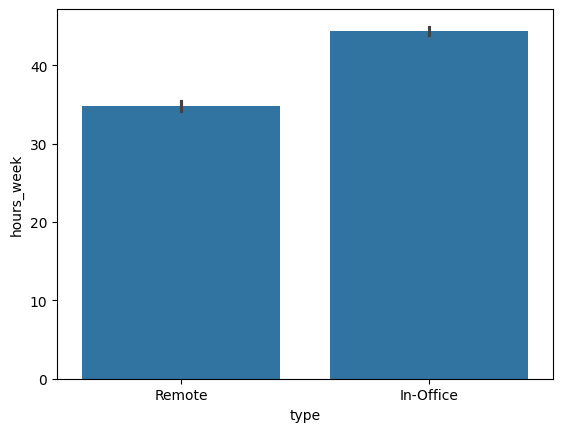

In [7]:
sb.barplot(x=result1['type'], y=result1['hours_week'])
result1_1 # avg hours per week by employment type

In [8]:
second_query = '''
SELECT Hours_Worked_Per_Week week_hours, Productivity_Score	productivity, Employment_Type
FROM table1
'''
second_query2 = '''
SELECT Hours_Worked_Per_Week week_hours, Productivity_Score	productivity
FROM table1
WHERE Employment_Type = 'In-Office'
'''
second_query3 = '''
SELECT Hours_Worked_Per_Week week_hours, Productivity_Score	productivity
FROM table1
WHERE Employment_Type = 'Remote'
'''

In [9]:
result2 = psql.sqldf(second_query)
result2_1 = psql.sqldf(second_query2)
result2_2 = psql.sqldf(second_query3)

correlation_in-office: 0.03970535322328279
correlation_remote: -0.05983084541976498


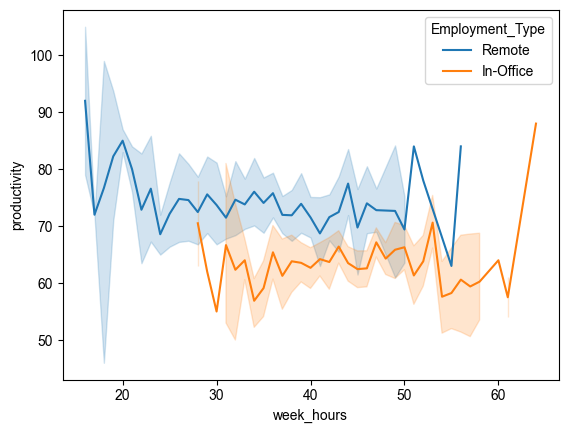

In [10]:
sb.lineplot(data=result2, x=result2['week_hours'], y=result2['productivity'], hue='Employment_Type')
sb.set_style('whitegrid')
correl=result2_1['week_hours'].corr(result2_1['productivity'])
print(f'correlation_in-office: {correl}')
correl2=result2_2['week_hours'].corr(result2_2['productivity'])
print(f'correlation_remote: {correl2}')
# кол-во рабочих часов в неделю почти не влияет на продуктивность, однако, в общем у удаленных сотрудников прдуктивность всегда лучше, за исключением
# рабочей недели более 60 часов в офисе, что может указывать на исключение или временный эффект(н-р важный проект),
# т.к. стабильно столько времени работать невозможно

In [11]:
third_query = '''
SELECT Employment_Type, AVG(Well_Being_Score) avg_well_being
FROM table1
GROUP BY Employment_Type
'''
third_query2 = '''
SELECT Employment_Type, Well_Being_Score
FROM table1
'''
third_query3 = '''
SELECT Employment_Type, Well_Being_Score
FROM table1
WHERE Well_Being_Score >= 70 AND Employment_Type = 'In-Office'
'''
third_query4 = '''
SELECT Employment_Type, Well_Being_Score
FROM table1
WHERE Well_Being_Score >= 70 AND Employment_Type = 'Remote'
'''

In [12]:
result3 = psql.sqldf(third_query)
result3_2 = psql.sqldf(third_query2)
result3_3 = psql.sqldf(third_query3)
result3_4 = psql.sqldf(third_query4)

<Axes: xlabel='Employment_Type', ylabel='Well_Being_Score'>

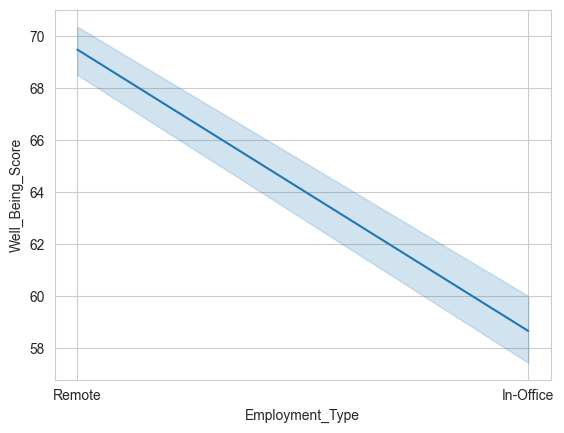

In [13]:
sb.lineplot(x=result3_2['Employment_Type'], y=result3_2['Well_Being_Score'])
# зачастую, как и средне, на удаленном формате работы люди более довольны, чем в офисном

In [14]:
fourth_query = '''
SELECT Employee_ID, Productivity_Score productivity, Well_Being_Score WB_score
FROM table1
'''

In [15]:
result4 = psql.sqldf(fourth_query)

correlation: 0.1351631821994384


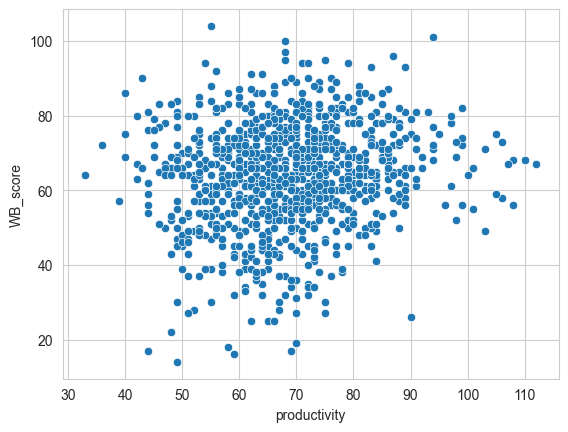

In [16]:
sb.scatterplot(x=result4['productivity'], y=result4['WB_score'])
correl2 = result4['productivity'].corr(result4['WB_score'])
print(f'correlation: {correl2}')
# благополучие почти не влияет на продуктивность

In [17]:
table1

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74
...,...,...,...,...,...
995,996,Remote,33,88,82
996,997,Remote,33,88,73
997,998,In-Office,45,74,61
998,999,In-Office,57,50,52


In [18]:
five_query = '''
SELECT Employee_ID ID, Hours_Worked_Per_Week hours_per_week, Productivity_Score
FROM table1
WHERE Hours_Worked_Per_Week > 40 AND Productivity_Score > (SELECT AVG(Productivity_Score) FROM table1)
'''

In [19]:
result5 = psql.sqldf(five_query)
result5
# Сотрудники, работающие более 40 часов в неделю с продуктивностью выше среднего

,ID,hours_per_week,Productivity_Score
0,5,50,70
1,14,42,78
2,15,47,76
3,16,44,81
4,17,58,73
...,...,...,...
192,978,41,74
193,981,41,71
194,982,45,78
195,993,41,71


In [20]:
six_query = '''
SELECT Hours_Worked_Per_Week hours_week, Productivity_Score 
FROM table1
'''

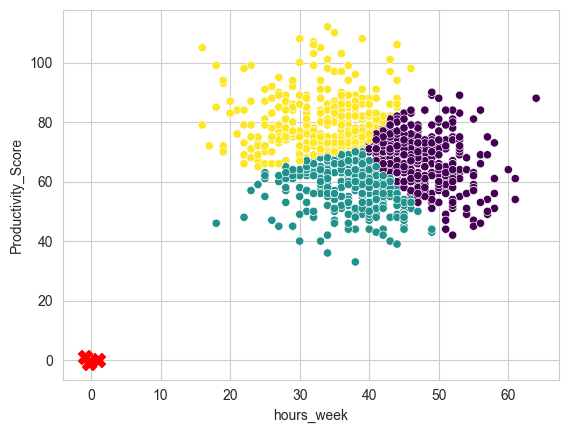

In [21]:
result6 = psql.sqldf(six_query)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(result6)
kmeans = KMeans(n_clusters=3)
result6['Cluster'] = kmeans.fit_predict(scaled_data)
sb.scatterplot(x=result6['hours_week'], y=result6['Productivity_Score'], c=result6['Cluster'], cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)